In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from os.path import exists
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from data.get_uci import all_datasets
from analysis.util import fetch, init_uci_dict, get_uci_info

In [2]:
filters = {
    "group": "benchmark"
}
raw = fetch("softki", filters)

100%|██████████| 133/133 [00:57<00:00,  2.30it/s]


In [3]:
# filters = {
#     "group": "benchmark6",
# }
# raw2 = fetch("soft-gp-2", filters)

In [4]:
uci_info = get_uci_info()

In [5]:
uci_dict = {}
for exp in raw:
    model = exp.config["model.name"]
    dataset = exp.config["dataset.name"]
    if model == "exact":
        continue
    num_inducing = exp.config["model.num_inducing"]
    dtype = exp.config["model.dtype"]
    seed = exp.config["training.seed"]
    train_frac = float(exp.config["dataset.train_frac"])
    if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
        print("FAIL", (dataset, seed, num_inducing, train_frac, model))
    uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

# for exp in raw2:
#     model = exp.config["model.name"]
#     if model == "sv-gp" or model == "svi-gp":
#         dataset = exp.config["dataset.name"]
#         num_inducing = exp.config["model.num_inducing"]
#         dtype = exp.config["model.dtype"]
#         seed = exp.config["training.seed"]
#         train_frac = float(exp.config["dataset.train_frac"])
#         if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
#             print("FAIL", (dataset, seed, num_inducing, train_frac, model))
#         uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

In [6]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
fracs = [0.9]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            for frac in fracs:
                xs = []
                ts = []
                for dataset, _, _, _ in uci_info:
                    try:
                        xs += [uci_dict[(dataset, seed, num_inducing, frac, model)]["test_rmse"][49]]
                        ts += [np.array(uci_dict[(dataset, seed, num_inducing, frac, model)]["epoch_time"][49]).mean()]
                    except Exception as e:
                        xs += [np.nan]
                        ts += [np.nan]
                        print("Exception", e, model, dataset)

                tmp[f"{model}-{num_inducing}-{frac}-{seed}"] = xs
                tmp[f"time-{model}-{num_inducing}-{frac}-{seed}"] = ts

df = pd.DataFrame(data=tmp)
df.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df

Exception ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception 'test_rmse' sv-gp 3droad
Exception 'test_rmse' sv-gp song
Exception 'test_rmse' sv-gp buzz
Exception 'test_rmse' sv-gp houseelectric
Exception ('pol', 6535, 1024, 0.9, 'sv-gp') sv-gp pol
Excep

,N,D,soft-gp-512-0.9-6535,time-soft-gp-512-0.9-6535,soft-gp-1024-0.9-6535,time-soft-gp-1024-0.9-6535,svi-gp-512-0.9-6535,time-svi-gp-512-0.9-6535,svi-gp-1024-0.9-6535,time-svi-gp-1024-0.9-6535,...,soft-gp-1024-0.9-92357,time-soft-gp-1024-0.9-92357,svi-gp-512-0.9-92357,time-svi-gp-512-0.9-92357,svi-gp-1024-0.9-92357,time-svi-gp-1024-0.9-92357,sv-gp-512-0.9-92357,time-sv-gp-512-0.9-92357,sv-gp-1024-0.9-92357,time-sv-gp-1024-0.9-92357
Pol,13500,26,0.189090,0.997318,NaN,NaN,0.311351,0.951112,0.293882,1.075424,...,NaN,NaN,0.321627,0.933237,0.302316,1.013606,0.268230,0.010145,NaN,NaN
Elevators,14939,18,0.391091,1.042252,NaN,NaN,0.390397,1.079308,0.388313,1.031871,...,NaN,NaN,0.381564,0.982990,0.380849,1.115683,0.394575,0.010030,NaN,NaN
Bike,15641,17,0.207343,1.023231,NaN,NaN,0.283666,1.109298,0.271767,1.135332,...,NaN,NaN,0.279389,1.059826,0.266691,1.157322,0.282345,0.012380,NaN,NaN
Kin40k,36000,8,0.242823,2.490466,NaN,NaN,0.235442,2.368217,0.197408,2.318797,...,NaN,NaN,0.229365,2.285490,0.192121,2.490341,0.201698,0.014051,NaN,NaN
Protein,41157,9,0.656468,2.671560,NaN,NaN,0.692958,2.611620,0.666384,2.799227,...,NaN,NaN,0.687822,2.691274,0.660601,2.803726,0.662737,0.014468,NaN,NaN
Keggdirected,43944,20,0.078806,2.874196,NaN,NaN,0.086383,2.850727,0.085386,3.049994,...,NaN,NaN,0.094034,2.771822,0.093863,2.899296,0.097449,0.014813,NaN,NaN
Slice,48150,385,0.051143,3.252744,NaN,NaN,0.139538,3.332145,0.128206,3.319141,...,NaN,NaN,0.137801,3.139663,0.125386,3.054134,0.454756,0.015817,NaN,NaN
Keggundirected,57247,27,0.116864,3.702446,NaN,NaN,0.130468,3.707572,0.130294,3.837075,...,NaN,NaN,0.131541,3.635197,0.131150,3.883725,0.131551,0.016218,NaN,NaN
3droad,391386,3,0.605115,24.244727,NaN,NaN,0.531515,24.976721,0.495679,24.625670,...,NaN,NaN,0.527727,25.077152,0.494483,24.706980,NaN,NaN,NaN,NaN
Song,270000,90,0.797246,17.626724,NaN,NaN,0.810078,17.742883,0.808013,17.128550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot RMSE

In [7]:
def pm_var(df, model):
    # print(df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1))
    m = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))
df_rmse = pd.DataFrame()
df_rmse[['N', 'D']] = df[['N', 'D']]
for model in ["soft-gp-512", "sv-gp-512", "svi-gp-1024"]:
    for frac in [0.9]:
        df_rmse[f'{model}-{frac}'] = pm_var(df, f'{model}-{frac}')

df_rmse

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
Pol,13500,26,0.195 $\pm$ 0.006,0.261 $\pm$ 0.008,0.3 $\pm$ 0.005
Elevators,14939,18,0.389 $\pm$ 0.01,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Bike,15641,17,0.204 $\pm$ 0.006,0.284 $\pm$ 0.002,0.268 $\pm$ 0.003
Kin40k,36000,8,0.237 $\pm$ 0.008,0.205 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.649 $\pm$ 0.01,0.66 $\pm$ 0.009,0.659 $\pm$ 0.008
Keggdirected,43944,20,0.081 $\pm$ 0.005,0.096 $\pm$ 0.007,0.088 $\pm$ 0.005
Slice,48150,385,0.049 $\pm$ 0.003,0.479 $\pm$ 0.027,0.127 $\pm$ 0.001
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.126 $\pm$ 0.005,0.127 $\pm$ 0.007
3droad,391386,3,0.605 $\pm$ 0.0,-,0.496 $\pm$ 0.001
Song,270000,90,0.794 $\pm$ 0.004,-,0.805 $\pm$ 0.004


In [8]:
df2 = df_rmse[["N", "D", "soft-gp-512-0.9", "sv-gp-512-0.9", "svi-gp-1024-0.9"]]
df2 = df2.sort_values(by=['D'], ascending=[True])
df2

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,0.605 $\pm$ 0.0,-,0.496 $\pm$ 0.001
Kin40k,36000,8,0.237 $\pm$ 0.008,0.205 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.649 $\pm$ 0.01,0.66 $\pm$ 0.009,0.659 $\pm$ 0.008
Houseelectric,1844352,11,0.064 $\pm$ 0.001,-,0.071 $\pm$ 0.0
Bike,15641,17,0.204 $\pm$ 0.006,0.284 $\pm$ 0.002,0.268 $\pm$ 0.003
Elevators,14939,18,0.389 $\pm$ 0.01,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Keggdirected,43944,20,0.081 $\pm$ 0.005,0.096 $\pm$ 0.007,0.088 $\pm$ 0.005
Pol,13500,26,0.195 $\pm$ 0.006,0.261 $\pm$ 0.008,0.3 $\pm$ 0.005
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.126 $\pm$ 0.005,0.127 $\pm$ 0.007
Buzz,524925,77,0.254 $\pm$ 0.002,-,0.296 $\pm$ 0.0


In [9]:
latex_table = df2.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & sv-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 0.605 $\pm$ 0.0 & - & 0.496 $\pm$ 0.001 \\
Kin40k & 36000 & 8 & 0.237 $\pm$ 0.008 & 0.205 $\pm$ 0.008 & 0.192 $\pm$ 0.006 \\
Protein & 41157 & 9 & 0.649 $\pm$ 0.01 & 0.66 $\pm$ 0.009 & 0.659 $\pm$ 0.008 \\
Houseelectric & 1844352 & 11 & 0.064 $\pm$ 0.001 & - & 0.071 $\pm$ 0.0 \\
Bike & 15641 & 17 & 0.204 $\pm$ 0.006 & 0.284 $\pm$ 0.002 & 0.268 $\pm$ 0.003 \\
Elevators & 14939 & 18 & 0.389 $\pm$ 0.01 & 0.401 $\pm$ 0.007 & 0.389 $\pm$ 0.009 \\
Keggdirected & 43944 & 20 & 0.081 $\pm$ 0.005 & 0.096 $\pm$ 0.007 & 0.088 $\pm$ 0.005 \\
Pol & 13500 & 26 & 0.195 $\pm$ 0.006 & 0.261 $\pm$ 0.008 & 0.3 $\pm$ 0.005 \\
Keggundirected & 57247 & 27 & 0.115 $\pm$ 0.004 & 0.126 $\pm$ 0.005 & 0.127 $\pm$ 0.007 \\
Buzz & 524925 & 77 & 0.254 $\pm$ 0.002 & - & 0.296 $\pm$ 0.0 \\
Song & 270000 & 90 & 0.794 $\pm$ 0.004 & - & 0.805 $\pm$ 0.004 \\
Slice & 48150 & 385 & 0.049 $\pm$ 0.00

# Plot Time

In [10]:
def pm_var_time(df, model):
    m = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))

tmp = {
    "N": [int(np.floor(N * .9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
    "exact-rep": [e for _, _, _, e in uci_info],
}
df_time = pd.DataFrame()
df_time.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
for model in models:
    for num_inducing in num_inducings:
        for frac in fracs:
            col = pm_var_time(df, f'{model}-{num_inducing}-{frac}')
            df_time[f'{model}-{num_inducing}-{frac}'] = col
df_time

,soft-gp-512-0.9,soft-gp-1024-0.9,svi-gp-512-0.9,svi-gp-1024-0.9,sv-gp-512-0.9,sv-gp-1024-0.9
Pol,0.979 $\pm$ 0.016,-,0.95 $\pm$ 0.017,1.031 $\pm$ 0.039,0.01 $\pm$ 0.002,-
Elevators,1.031 $\pm$ 0.025,-,1.02 $\pm$ 0.052,1.082 $\pm$ 0.044,0.011 $\pm$ 0.001,-
Bike,1.046 $\pm$ 0.055,-,1.099 $\pm$ 0.035,1.139 $\pm$ 0.017,0.013 $\pm$ 0.0,-
Kin40k,2.478 $\pm$ 0.022,-,2.34 $\pm$ 0.047,2.403 $\pm$ 0.086,0.014 $\pm$ 0.0,-
Protein,2.654 $\pm$ 0.051,-,2.643 $\pm$ 0.042,2.804 $\pm$ 0.005,0.015 $\pm$ 0.0,-
Keggdirected,2.841 $\pm$ 0.029,-,2.807 $\pm$ 0.04,2.926 $\pm$ 0.113,0.015 $\pm$ 0.0,-
Slice,3.213 $\pm$ 0.035,-,3.174 $\pm$ 0.144,3.205 $\pm$ 0.136,0.017 $\pm$ 0.001,-
Keggundirected,3.627 $\pm$ 0.079,-,3.724 $\pm$ 0.098,3.822 $\pm$ 0.071,0.016 $\pm$ 0.0,-
3droad,24.257 $\pm$ 0.136,-,25.014 $\pm$ 0.055,24.818 $\pm$ 0.266,-,-
Song,17.466 $\pm$ 0.228,-,17.573 $\pm$ 0.24,17.288 $\pm$ 0.226,-,-


In [11]:
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
df_44 = pd.DataFrame(data=tmp)
df_44.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df5 = pd.concat([df_44, df_time[["soft-gp-512-0.9", "svi-gp-512-0.9", "svi-gp-1024-0.9"]]], axis=1)
df5 = df5.sort_values(by=['D'], ascending=[True])
df5

,N,D,soft-gp-512-0.9,svi-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,24.257 $\pm$ 0.136,25.014 $\pm$ 0.055,24.818 $\pm$ 0.266
Kin40k,36000,8,2.478 $\pm$ 0.022,2.34 $\pm$ 0.047,2.403 $\pm$ 0.086
Protein,41157,9,2.654 $\pm$ 0.051,2.643 $\pm$ 0.042,2.804 $\pm$ 0.005
Houseelectric,1844352,11,115.498 $\pm$ 1.105,115.799 $\pm$ 1.305,115.86 $\pm$ 1.018
Bike,15641,17,1.046 $\pm$ 0.055,1.099 $\pm$ 0.035,1.139 $\pm$ 0.017
Elevators,14939,18,1.031 $\pm$ 0.025,1.02 $\pm$ 0.052,1.082 $\pm$ 0.044
Keggdirected,43944,20,2.841 $\pm$ 0.029,2.807 $\pm$ 0.04,2.926 $\pm$ 0.113
Pol,13500,26,0.979 $\pm$ 0.016,0.95 $\pm$ 0.017,1.031 $\pm$ 0.039
Keggundirected,57247,27,3.627 $\pm$ 0.079,3.724 $\pm$ 0.098,3.822 $\pm$ 0.071
Buzz,524925,77,33.779 $\pm$ 0.356,32.897 $\pm$ 0.291,33.94 $\pm$ 0.225


In [12]:
latex_table = df5.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & svi-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 24.257 $\pm$ 0.136 & 25.014 $\pm$ 0.055 & 24.818 $\pm$ 0.266 \\
Kin40k & 36000 & 8 & 2.478 $\pm$ 0.022 & 2.34 $\pm$ 0.047 & 2.403 $\pm$ 0.086 \\
Protein & 41157 & 9 & 2.654 $\pm$ 0.051 & 2.643 $\pm$ 0.042 & 2.804 $\pm$ 0.005 \\
Houseelectric & 1844352 & 11 & 115.498 $\pm$ 1.105 & 115.799 $\pm$ 1.305 & 115.86 $\pm$ 1.018 \\
Bike & 15641 & 17 & 1.046 $\pm$ 0.055 & 1.099 $\pm$ 0.035 & 1.139 $\pm$ 0.017 \\
Elevators & 14939 & 18 & 1.031 $\pm$ 0.025 & 1.02 $\pm$ 0.052 & 1.082 $\pm$ 0.044 \\
Keggdirected & 43944 & 20 & 2.841 $\pm$ 0.029 & 2.807 $\pm$ 0.04 & 2.926 $\pm$ 0.113 \\
Pol & 13500 & 26 & 0.979 $\pm$ 0.016 & 0.95 $\pm$ 0.017 & 1.031 $\pm$ 0.039 \\
Keggundirected & 57247 & 27 & 3.627 $\pm$ 0.079 & 3.724 $\pm$ 0.098 & 3.822 $\pm$ 0.071 \\
Buzz & 524925 & 77 & 33.779 $\pm$ 0.356 & 32.897 $\pm$ 0.291 & 33.94 $\pm$ 0.225 \\
Song & 270000 & 90 & 17.466 $\pm$ 0.22

# Plot Bins

In [13]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
frac = 0.9
# fracs = [0.44, 0.89]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            K_zzs = []
            bins1 = []
            bins2 = []
            bins3 = []
            bins4 = []
            bins5 = []
            bins6 = []
            for dataset, _, _, _ in uci_info:
                try:
                    # K_zzs += [uci_dict[(dataset, seed, num_inducing, model)]["K_zz"][i] for i in range(5)]
                    bins1 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.0"][49]]
                    bins2 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-20"][49]]
                    bins3 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-10"][49]]
                    bins4 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-05"][49]]
                    bins5 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.01"][49]]
                    bins6 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.5"][49]]
                except Exception as e:
                    bins1 += [np.nan]
                    bins2 += [np.nan]
                    bins3 += [np.nan]
                    bins4 += [np.nan]
                    bins5 += [np.nan]
                    bins6 += [np.nan]
                    print("Exception bins", e, model, dataset)

            all_bins[f"0.0-{model}-{num_inducing}-{seed}"] = bins1
            all_bins[f"1e-20-{model}-{num_inducing}-{seed}"] = bins2
            all_bins[f"1e-10-{model}-{num_inducing}-{seed}"] = bins3
            all_bins[f"1e-05-{model}-{num_inducing}-{seed}"] = bins4
            all_bins[f"0.01-{model}-{num_inducing}-{seed}"] = bins5
            all_bins[f"0.5-{model}-{num_inducing}-{seed}"] = bins6
            KZZ[f"kzz-{model}-{num_inducing}-{seed}"] = K_zzs


Exception bins ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception bins ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception bins ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception bins ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception bins ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception bins ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception bins ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception bins ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception bins ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception bins ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception bins ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception bins ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception bins 'K_zz_bin_0.0' sv-gp 3droad
Exception bins 'K_zz_bin_0.0' sv-gp song
Exception bins 'K_zz_bin_0.0' sv-gp buzz
Exception bins 'K

In [14]:
df_bins = pd.DataFrame(data=all_bins)
df_bins.index = [name.replace("_", "-") for name, _, _, _ in uci_info]
df_bins

,0.0-soft-gp-512-6535,1e-20-soft-gp-512-6535,1e-10-soft-gp-512-6535,1e-05-soft-gp-512-6535,0.01-soft-gp-512-6535,0.5-soft-gp-512-6535,0.0-soft-gp-1024-6535,1e-20-soft-gp-1024-6535,1e-10-soft-gp-1024-6535,1e-05-soft-gp-1024-6535,...,1e-10-sv-gp-512-92357,1e-05-sv-gp-512-92357,0.01-sv-gp-512-92357,0.5-sv-gp-512-92357,0.0-sv-gp-1024-92357,1e-20-sv-gp-1024-92357,1e-10-sv-gp-1024-92357,1e-05-sv-gp-1024-92357,0.01-sv-gp-1024-92357,0.5-sv-gp-1024-92357
pol,254336,5358,1454,152,82,516,NaN,NaN,NaN,NaN,...,74160.0,25704.0,11016.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
elevators,8282,22480,72586,33308,32268,1506,NaN,NaN,NaN,NaN,...,5596.0,5914.0,160156.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
bike,0,0,2842,12504,86140,19772,NaN,NaN,NaN,NaN,...,0.0,22.0,192674.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
kin40k,320,15226,60568,28378,45780,9082,NaN,NaN,NaN,NaN,...,0.0,36.0,187748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
protein,149374,51514,33716,6884,4064,2020,NaN,NaN,NaN,NaN,...,60214.0,19072.0,38238.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
keggdirected,26246,15776,26214,13458,52466,28520,NaN,NaN,NaN,NaN,...,26704.0,12884.0,114354.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
slice,261632,0,0,0,0,512,NaN,NaN,NaN,NaN,...,118192.0,55180.0,2620.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
keggundirected,256904,2666,684,136,66,1400,NaN,NaN,NaN,NaN,...,27270.0,16730.0,77930.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3droad,256102,1784,914,234,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,116194,143222,2120,40,8,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


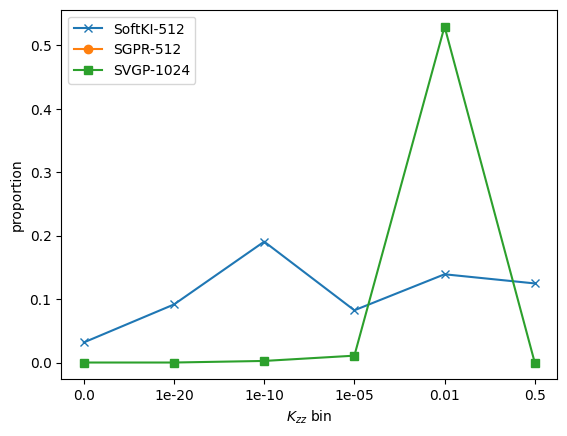

In [15]:
def plot_bins(dataset):
    bins = ["0.0", "1e-20", "1e-10", "1e-05", "0.01", "0.5"]
    plt.plot([df_bins[f"{x}-soft-gp-512-6535"][dataset]/(512**2) for x in bins], label="SoftKI-512", marker="x")
    plt.plot([df_bins[f"{x}-sv-gp-512-6535"][dataset]/(512**2) for x in bins], label="SGPR-512", marker="o")
    plt.plot([df_bins[f"{x}-svi-gp-1024-6535"][dataset]/(1024**2) for x in bins], label="SVGP-1024", marker="s")
    plt.xticks(range(len(bins)), labels=bins)
    plt.xlabel(r"$K_{zz}$ bin")
    plt.ylabel("proportion")
    plt.legend()
    plt.savefig(f"compare/{dataset}.png", bbox_inches="tight")

plot_bins("houseelectric")

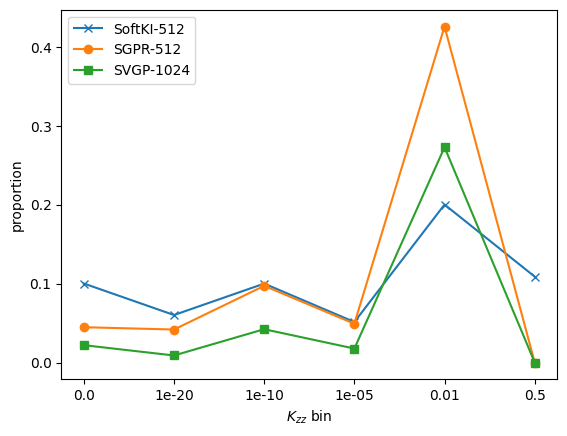

In [16]:
plot_bins("keggdirected")

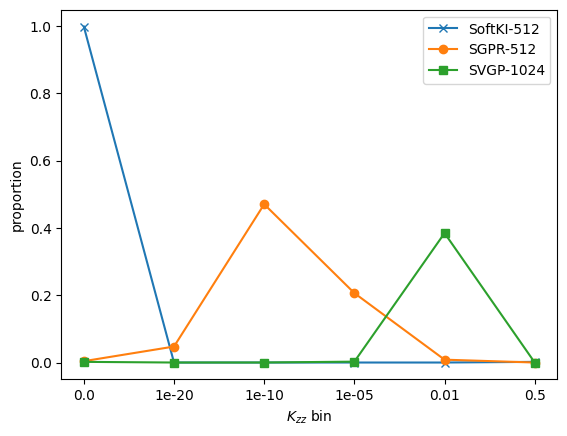

In [17]:
plot_bins("slice")